In [3]:
# CUSTOMER CHURN PREDICTION PROJECT
# Author: Deepa K
# ---- Step 1: Import Libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [7]:
# ---- Step 2: Load the Data ----
df = pd.read_csv("/Users/deepa/Desktop/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [16]:
# ---- Step 2: Inspect the Data ----

# Display first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape

(7043, 21)

In [18]:

# Check for missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum())



❓ Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
# Check unique values in 'Churn' column
print("\n💡 Unique Churn Values:", df['Churn'].unique())


💡 Unique Churn Values: ['No' 'Yes']


In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
(df == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# ---- Step 3: Clean the Data ----

# Replace blank strings (" ") with NaN
df.replace(" ", np.nan, inplace=True)

In [25]:
df.isnull().values.any()

np.True_

In [26]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with any missing values
df.dropna(inplace=True)

# Confirm cleaning
print("\n✅ Data cleaned. Updated info:")
df.info()

# Basic stats
print("\n📊 Summary statistics:")
display(df.describe())


✅ Data cleaned. Updated info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df.isnull().values.any()

np.False_

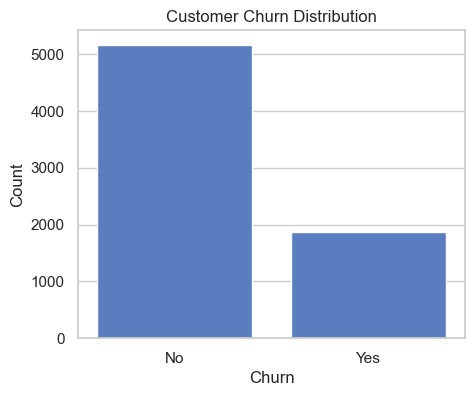

Churn Distribution (%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [28]:
# ---- Step 4: Exploratory Data Analysis ----

import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
sns.set(style="whitegrid", palette="muted")

# Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Show churn percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):\n", churn_rate)

<Figure size 600x400 with 0 Axes>

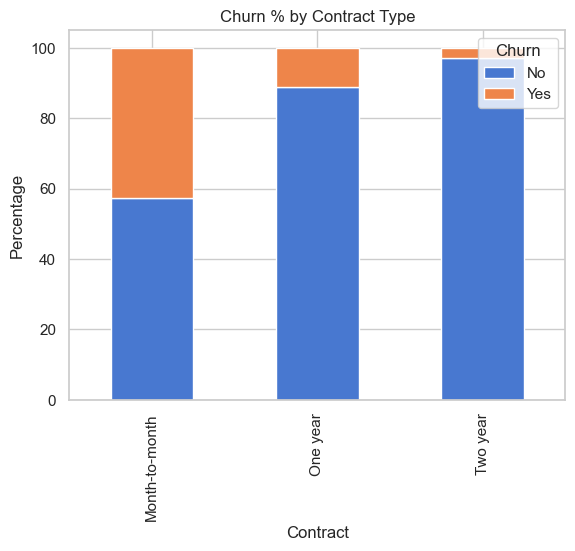

<Figure size 600x400 with 0 Axes>

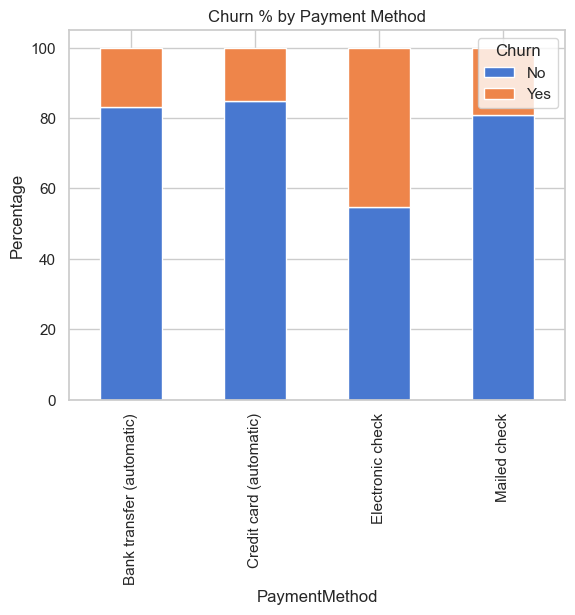

In [29]:
# ---- Step 5: Churn by Contract Type ----

plt.figure(figsize=(6,4))
contract_churn = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
contract_churn.plot(kind="bar", stacked=True)
plt.title("Churn % by Contract Type")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc="upper right")
plt.show()

# ---- Churn by Payment Method ----
plt.figure(figsize=(6,4))
payment_churn = pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index") * 100
payment_churn.plot(kind="bar", stacked=True)
plt.title("Churn % by Payment Method")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc="upper right")
plt.show()

In [30]:
# ---- Month-to-month contracts churn the most ----
# ---- Electronic check payment customers have high churn rates ----


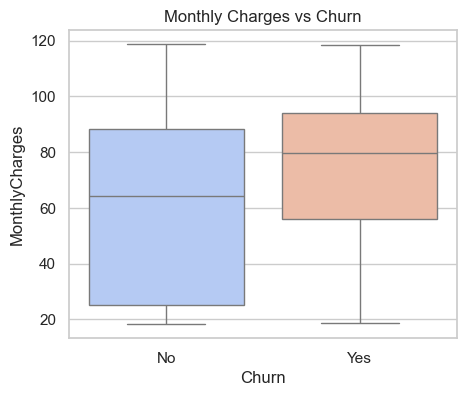

In [32]:
# ---- Step 6: Monthly Charges vs Churn ----

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", hue="Churn", palette="coolwarm", dodge=False)
plt.title("Monthly Charges vs Churn")
plt.legend([],[], frameon=False)  # hides duplicate legend
plt.show()

In [33]:
#--Churn is higher among customers with month-to-month contracts and electronic check payments.--
#Customers with higher monthly charges are more likely to churn, suggesting pricing and billing type as key drivers.”--

In [34]:
# ---- Step 7: Feature Encoding and Train-Test Split ----

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop the customerID column (not useful for prediction)
df_model = df.drop(columns=["customerID"])

# Encode categorical columns
le = LabelEncoder()
for col in df_model.select_dtypes(include="object"):
    df_model[col] = le.fit_transform(df_model[col])

# Split features and target
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numeric columns for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data ready for modeling!")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

✅ Data ready for modeling!
Training set shape: (4922, 19)
Test set shape: (2110, 19)


In [35]:
# ---- Step 8: Train Logistic Regression Model ----

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Create and fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Model Accuracy: {acc:.3f}")
print(f"ROC AUC Score: {auc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.800
ROC AUC Score: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



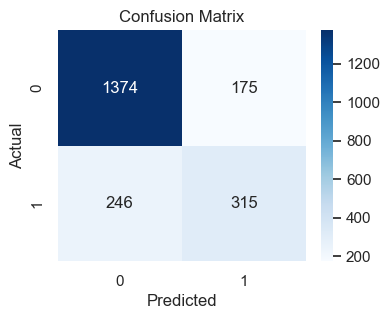

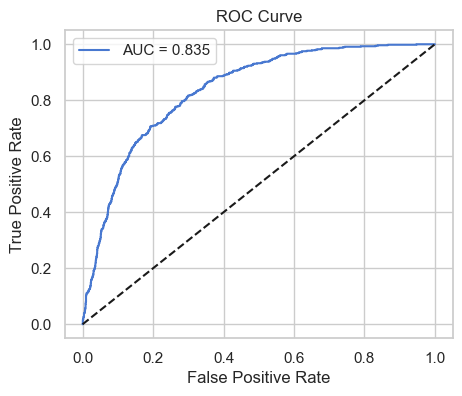

In [36]:
# ---- Step 9: Visualize Evaluation ----

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
# ---- Step 10: Interpret and Summarize ----

coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Top 10 Features Driving Churn:\n")
display(coef_table.head(10))

summary = f"""
🔹 Model Accuracy: {acc:.3f}
🔹 ROC AUC: {auc:.3f}

"""

Top 10 Features Driving Churn:



,Feature,Coefficient
18,TotalCharges,0.710488
17,MonthlyCharges,0.689295
15,PaperlessBilling,0.171446
7,InternetService,0.145634
6,MultipleLines,0.107811
16,PaymentMethod,0.092929
1,SeniorCitizen,0.071904
2,Partner,0.017914
12,StreamingTV,0.006428
0,gender,-0.002133


In [40]:
#Customers on month-to-month contracts are most likely to churn.
#Higher monthly charges increase churn likelihood.
#Longer tenure and automatic payments reduce churn risk.
